In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as st

In [2]:
def plot_history(data, name: str, boundaries = None):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)
    # Plot the histogram.
    # Plot the PDF.
    plt.figure(figsize=(5, 4))
    plt.hist(data, bins=100, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "{}; mu={:.2f}; std={:.2f}".format(name, mu, std)
    
    if boundaries:
        plt.axvline(boundaries[0], color='red')
        plt.axvline(boundaries[1], color='red')
        
    plt.axvline(mu - 2 * std)
    plt.axvline(mu + 2 * std)
    plt.xlim(mu - 3 * std, mu + 3 * std)
    plt.xlabel("accuracy")
    plt.title(title)
    plt.show()
    return mu, std

In [3]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [94]:
df = pd.DataFrame(columns=['model_name', 'mode', 'target', 'array', 'mu', 'std'])
df

,model_name,mode,target,array,mu,std


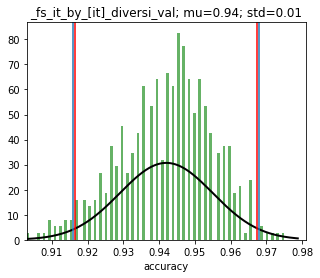

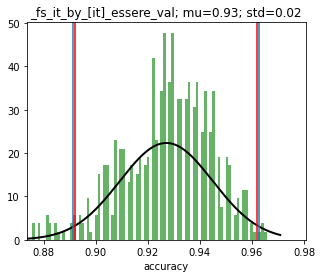

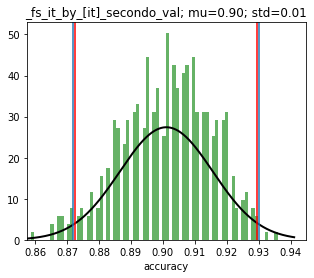

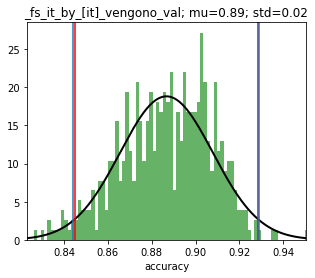

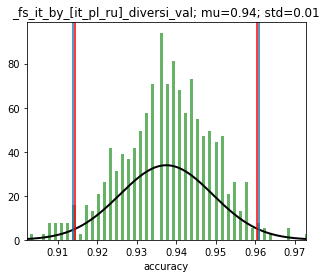

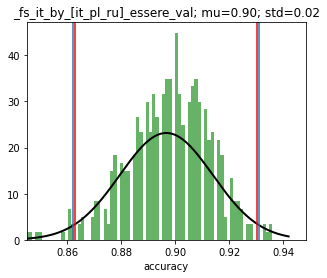

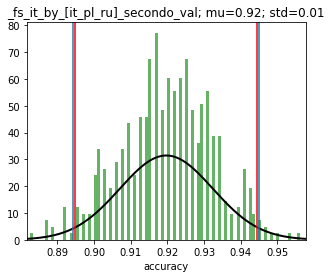

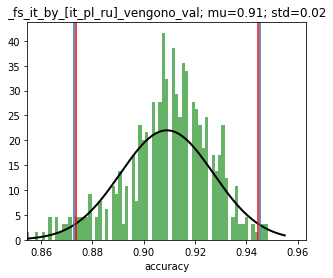

In [95]:
from numpy import loadtxt

# targets = ["essere", "quella", "secondo", "tutte", "vengono", "diversi", "fase", "attualmente"]

# targets = ['occhi', 'viene']
# modes = ['val']
# models = [
#     'fs_it_by_[pl]_4_8_8',
#     'fs_it_by_[pl]_16_16_1',
#     'fs_it_by_[pl]_2_8_16',
#     'fs_it_by_[pl]_16_2_8',
# ]

# targets = ['шулай', 'кешенең']
# modes = ['val']
# models = [
#     'fs_tt_by_[pl]_4_8_8',
#     'fs_tt_by_[pl]_16_16_1',
#     'fs_tt_by_[pl]_2_8_16',
#     'fs_tt_by_[pl]_16_2_8',
# ]

# targets = ['midagi', 'näiteks']
# modes = ['val']
# models = [
#     'et_by_[it]',
#     'et_by_[it_no_aug]',
#     'et_by_[pl]',
#     'et_by_[pl_no_aug]'    
# ]

targets = ['diversi', 'essere', 'secondo', 'vengono']
modes = ['val']
models = [
    'core_fs_pl_it_test_',
    'core_fs_ru_it_',
    '_fs_it_by_[it]',
    'core_fs_[pl_ru]_it_',
    '_fs_it_by_[it_pl_ru]',
]


# targets = ['aasta', 'saanud']
# modes = ['val']
# models = [
#     'et_by_[pl]',
#     'et_by_[ru]',
#     'et_by_[it]',
#     'et_by_[tt]',
#     '_fs_et_by_[it_pl_ru]',
#     '_fs_et_by_[it_pl_ru_tt]',
# ]


for model in models:
    for target in targets:
        for mode in modes:
            path = f"output/{model}_{target}_{mode}.txt"
            with open(path, "r") as file:
                str_line = file.readline()
                array = np.array([float(x) for x in str_line[1:-2].split(",")])
            boundaries = norm.interval(alpha=0.95, loc=np.mean(array), scale=np.std(array))
#             boundaries = mean_confidence_interval(array, confidence=0.95)
            
#             if mode == 'val':
            mu, std = plot_history(array, f'{model}_{target}_{mode}', boundaries=boundaries)
            df = pd.concat([df, pd.DataFrame({'model_name': model, 'mode': mode, 'target': target, 'array': [array], 'mu': mu, 'std': std})], ignore_index=True)


In [96]:
alpha = 0.95
df['interval'] = df['array'].apply(lambda x: norm.interval(alpha=alpha, loc=np.mean(x), scale=np.std(x)))
# df['mean'] = df['array'].apply(lambda x: x.mean())
df[df['mode'] == 'val']
sub = df.sort_values(by='target', ascending=False).reset_index()

In [97]:
sub[['model_name', 'target', 'mu', 'std', 'interval']]

,model_name,target,mu,std,interval
0,_fs_it_by_[it],vengono,0.886747,0.021208,"(0.8451799487230097, 0.9283138012769904)"
1,_fs_it_by_[it_pl_ru],vengono,0.908997,0.018124,"(0.873474714326722, 0.9445190356732781)"
2,_fs_it_by_[it],secondo,0.901078,0.014555,"(0.8725500357122652, 0.9296062142877347)"
3,_fs_it_by_[it_pl_ru],secondo,0.919716,0.012680,"(0.8948626014810859, 0.9445686485189142)"
4,_fs_it_by_[it],essere,0.927106,0.017866,"(0.8920893926239607, 0.9621231073760393)"
5,_fs_it_by_[it_pl_ru],essere,0.896641,0.017231,"(0.8628676184808246, 0.9304136315191753)"
6,_fs_it_by_[it],diversi,0.942019,0.012993,"(0.9165535892373697, 0.9674839107626301)"
7,_fs_it_by_[it_pl_ru],diversi,0.937494,0.011781,"(0.9144036586554535, 0.9605838413445468)"


In [104]:
# targets = ['diversi', 'essere', 'secondo', 'vengono']
subdf = df[df['target']=='diversi']
# subdf = df.iloc[[0, 2, 4, 10]]
# subdf = df.iloc[[1, 3, 7, 5, 11]]
subdf.drop(columns=['array'], axis=1)

,model_name,mode,target,mu,std,interval
0,_fs_it_by_[it],val,diversi,0.942019,0.012993,"(0.9165535892373697, 0.9674839107626301)"
4,_fs_it_by_[it_pl_ru],val,diversi,0.937494,0.011781,"(0.9144036586554535, 0.9605838413445468)"


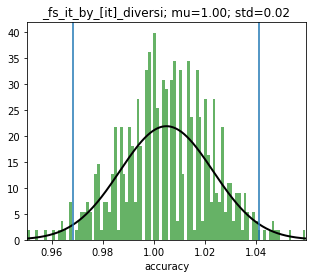

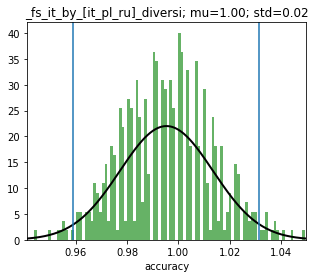

In [105]:
for index_of_best in range(len(subdf)): 
    array_best = subdf.iloc[index_of_best]['array']
    if len(array_best) > 500:
        array_best = array_best[:500]
    index_of_non_best = list(set(range(len(subdf))) - set([index_of_best]))
    # print(index_of_non_best)
    non_best_arrays = [subdf.iloc[index]['array'] for index in index_of_non_best]
    maximal_array = []
    for i in range(len(array_best)):
        mx = 0
        for j in range(len(non_best_arrays)):
            mx = max(mx, non_best_arrays[j][i])
        maximal_array.append(mx)
    array_best = np.array(array_best)
    maximal_array = np.array(maximal_array)
    fracs = array_best / maximal_array
    plot_history(fracs, f"{subdf.iloc[index_of_best]['model_name']}_{subdf.iloc[index_of_best]['target']}")
#     plot_history(fracs, f"[pl]_over_[pl_no_aug]_{subdf.iloc[index_of_best]['target']}")

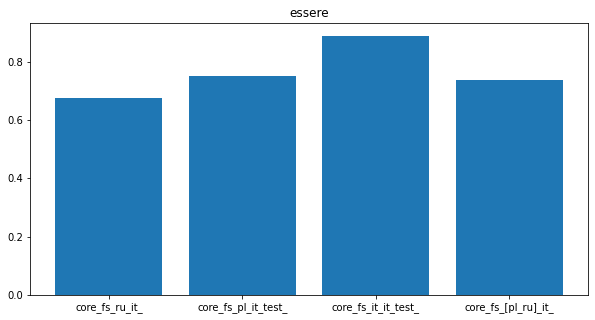

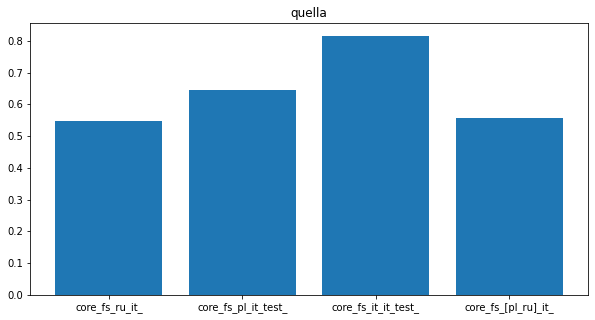

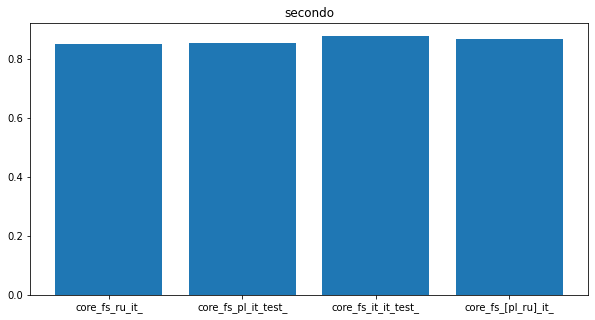

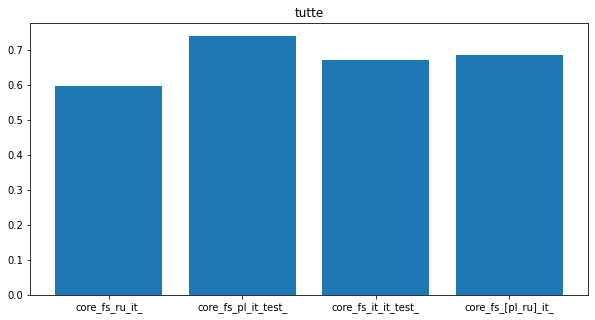

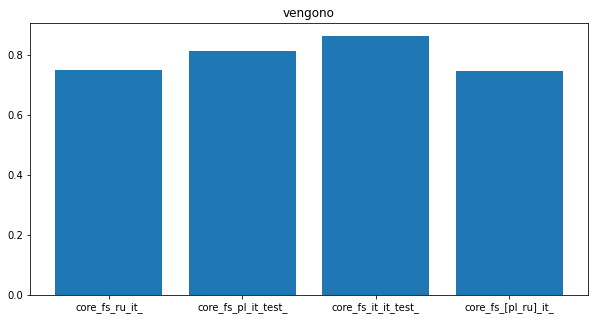

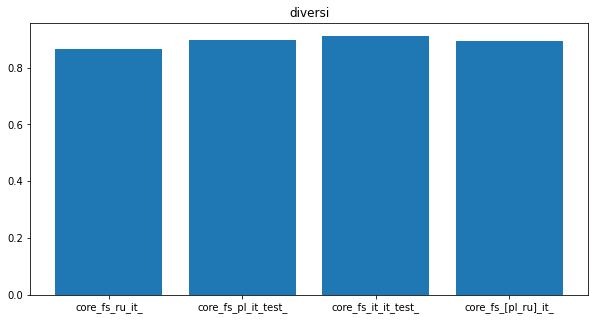

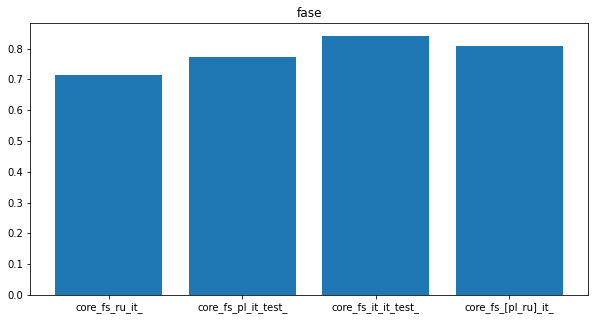

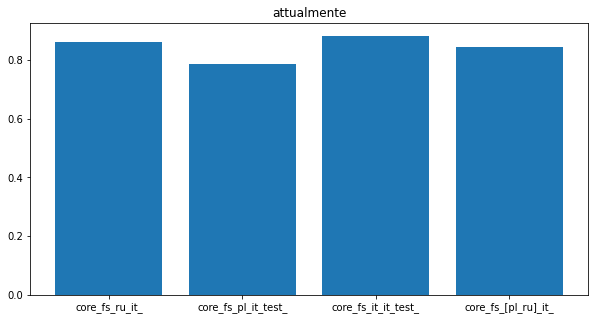

In [76]:
for target in df['target'].unique():
    sub_df = df[df['target'] == target]
    sub_df = sub_df[sub_df['mode'] == 'val']
    plt.figure(figsize=(10, 5))
    plt.bar(sub_df['model_name'], sub_df['mean'])
    plt.title(target)
    plt.show()

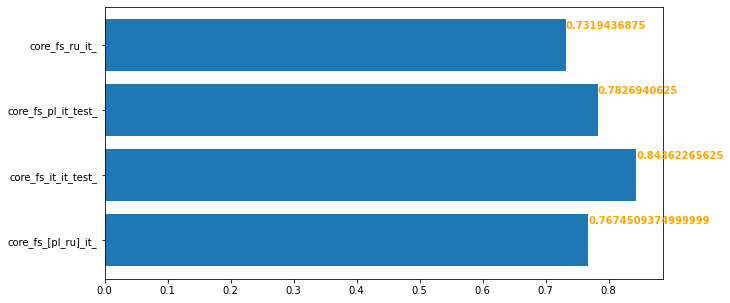

In [83]:
plt.figure(figsize=(10, 5))
sub_df = df[df['mode'] == 'val']
grouped = sub_df.groupby(['model_name']).mean()
plt.barh(grouped.index, grouped['mean'])
for i, v in enumerate(grouped['mean']):
    plt.text(v, i + .25, str(v), color='orange', fontweight='bold')
plt.show()

<AxesSubplot:>

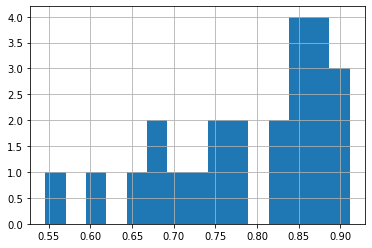

In [44]:
df[df['mode']=='val']['interval'].apply(lambda x: (x[0] + x[1]) / 2).hist(bins=15)

In [7]:
df = pd.read_csv('dataset/multilingual_spoken_words/wav/ru/ru_top_180_len_4.csv', delimiter=',')
display(df)
display(df['label'].value_counts())
display(list(df['label'].value_counts().index))

,Unnamed: 0,mode,label,path
0,0,test,ассамблеи,ассамблеи/common_voice_ru_18858622.wav
1,1,test,ассамблеи,ассамблеи/common_voice_ru_18868144.wav
2,2,test,ассамблеи,ассамблеи/common_voice_ru_18873703.wav
3,3,val,ассамблеи,ассамблеи/common_voice_ru_18875869.wav
4,4,val,ассамблеи,ассамблеи/common_voice_ru_18878177.wav
...,...,...,...,...
109695,109695,train,ядерного,ядерного/common_voice_ru_21991480.wav
109696,109696,train,ядерного,ядерного/common_voice_ru_22225583.wav
109697,109697,train,ядерного,ядерного/common_voice_ru_22225583__2.wav
109698,109698,test,ядерного,ядерного/common_voice_ru_22227323.wav


также           2482
слово           1952
этой            1791
должны          1768
этом            1678
                ... 
усилий           303
себя             300
поддерживает     300
участие          297
секретаря        295
Name: label, Length: 180, dtype: int64

['также',
 'слово',
 'этой',
 'должны',
 'этом',
 'является',
 'этого',
 'безопасности',
 'будет',
 'имеет',
 'сейчас',
 'наций',
 'конференции',
 'объединенных',
 'этот',
 'чтобы',
 'было',
 'организации',
 'поэтому',
 'сегодня',
 'быть',
 'всех',
 'однако',
 'хотел',
 'благодарю',
 'очень',
 'того',
 'этих',
 'необходимо',
 'может',
 'усилия',
 'время',
 'совета',
 'которые',
 'теперь',
 'только',
 'более',
 'мира',
 'резолюции',
 'разоружению',
 'заявление',
 'работы',
 'нашей',
 'представитель',
 'государств',
 'есть',
 'международного',
 'наша',
 'страны',
 'были',
 'роль',
 'человека',
 'меня',
 'между',
 'здесь',
 'предоставляю',
 'развития',
 'этим',
 'государства',
 'была',
 'проблемы',
 'делегация',
 'следует',
 'связи',
 'если',
 'ядерного',
 'значение',
 'области',
 'всего',
 'стран',
 'являются',
 'можно',
 'оружия',
 'поддержку',
 'больше',
 'такой',
 'этому',
 'представителю',
 'один',
 'вопрос',
 'который',
 'должно',
 'свою',
 'права',
 'решения',
 'переговоров',
 'сло

In [5]:
def simplify_dataset(data):
    df = data[data['VALID']==True][['SET', 'LINK', 'WORD']]
    df = df.rename(columns={'SET': 'mode', 'LINK': 'path', 'WORD': 'label'})
    df['mode'] = df['mode'].map({'TEST': 'test', 'DEV': 'val', 'TRAIN': 'train'})
    df['path'] = df['path'].apply(lambda x: x.replace('.opus', '.wav'))
    df = df[['mode', 'label', 'path']]
    return df

def stats_dataset(data):
    df = pd.DataFrame(data['label'].value_counts()).rename(columns={'label': 'count'})
    for mode in data['mode'].unique():
        df[mode] = data[data['mode']==mode]['label'].value_counts()
        df[mode] = df[mode].fillna(0).astype(dtype=int)
    return df

def select_labels(data):
    return list(data[data['val'] >= 10].index)


def select_most_frequent(data, count):  
    df = data.sort_values('count', axis=0, ascending=False)
    return list(df[:count].index)

In [13]:
from functools import partial

languages = ["cs", "el", "tt", "uk", "ru", "pl"]
set_name = "popular_100"

selection_rule = partial(select_most_frequent, count=100)

path_to_csvs = f"dataset/multilingual_spoken_words/csv"
path_to_output = f"dataset/multilingual_spoken_words/wav"

for language in languages:
    path_to_csv = f'{path_to_csvs}/{language}/{language}_splits.csv'
    
    data = pd.read_csv(path_to_csv, ',')
    data = simplify_dataset(data)
    stats = stats_dataset(data)
    labels = selection_rule(stats)
    result = data[data['label'].isin(labels)]
    result = result.reset_index().drop(columns=['index'], axis=1)
    display(result)
    display(f"label ratio: {len(result['label'].unique())}/{len(data['label'].unique())}  summary ratio: {len(result) / len(data)}")

    result.to_csv(f'{path_to_output}/{language}/{language}_{set_name}.csv', ',')

/home/vkuzia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,mode,label,path
0,val,aby,aby/common_voice_cs_20452676.wav
1,val,aby,aby/common_voice_cs_20452781.wav
2,test,aby,aby/common_voice_cs_20455934.wav
3,train,aby,aby/common_voice_cs_20461329.wav
4,val,aby,aby/common_voice_cs_20462646.wav
...,...,...,...
23935,test,čas,čas/common_voice_cs_22219835.wav
23936,train,čas,čas/common_voice_cs_22324131.wav
23937,train,čas,čas/common_voice_cs_22324175.wav
23938,val,čas,čas/common_voice_cs_22324249.wav


'label ratio: 100/4196  summary ratio: 0.28865979381443296'

/home/vkuzia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,mode,label,path
0,test,άλλο,άλλο/common_voice_el_20429666.wav
1,train,άλλο,άλλο/common_voice_el_20488952.wav
2,train,άλλο,άλλο/common_voice_el_20489184.wav
3,train,άλλο,άλλο/common_voice_el_20530906.wav
4,train,άλλο,άλλο/common_voice_el_20542422.wav
...,...,...,...
13382,train,ώρα,ώρα/common_voice_el_21066254.wav
13383,train,ώρα,ώρα/common_voice_el_21071391.wav
13384,train,ώρα,ώρα/common_voice_el_21071812.wav
13385,val,ώρα,ώρα/common_voice_el_21313377.wav


'label ratio: 100/952  summary ratio: 0.5954276564515412'

/home/vkuzia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,mode,label,path
0,test,авыл,авыл/common_voice_tt_17351236.wav
1,val,авыл,авыл/common_voice_tt_17357826.wav
2,val,авыл,авыл/common_voice_tt_17359062.wav
3,val,авыл,авыл/common_voice_tt_17359399.wav
4,test,авыл,авыл/common_voice_tt_17364103.wav
...,...,...,...
32682,val,өчен,өчен/common_voice_tt_18929766.wav
32683,val,өчен,өчен/common_voice_tt_18929822.wav
32684,train,өчен,өчен/common_voice_tt_18941098.wav
32685,train,өчен,өчен/common_voice_tt_18941218.wav


'label ratio: 100/4489  summary ratio: 0.31871410602677486'

/home/vkuzia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,mode,label,path
0,train,або,або/common_voice_uk_20930610.wav
1,train,або,або/common_voice_uk_20930610__2.wav
2,train,або,або/common_voice_uk_20935765.wav
3,test,або,або/common_voice_uk_20948497.wav
4,val,або,або/common_voice_uk_20963313.wav
...,...,...,...
16348,train,які,які/common_voice_uk_22334187.wav
16349,train,які,які/common_voice_uk_22341605.wav
16350,train,які,які/common_voice_uk_22341703.wav
16351,train,які,які/common_voice_uk_22353447.wav


'label ratio: 100/3931  summary ratio: 0.2624458353394319'

/home/vkuzia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,mode,label,path
0,train,без,без/common_voice_ru_18853778.wav
1,train,без,без/common_voice_ru_18861251.wav
2,train,без,без/common_voice_ru_18864296.wav
3,train,без,без/common_voice_ru_18864374.wav
4,train,без,без/common_voice_ru_18868279.wav
...,...,...,...
108926,train,ядерного,ядерного/common_voice_ru_21991480.wav
108927,train,ядерного,ядерного/common_voice_ru_22225583.wav
108928,train,ядерного,ядерного/common_voice_ru_22225583__2.wav
108929,test,ядерного,ядерного/common_voice_ru_22227323.wav


'label ratio: 100/15864  summary ratio: 0.22489537805323692'

/home/vkuzia/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,mode,label,path
0,train,aby,aby/common_voice_pl_20559597.wav
1,train,aby,aby/common_voice_pl_20560105.wav
2,train,aby,aby/common_voice_pl_20560114.wav
3,test,aby,aby/common_voice_pl_20603018.wav
4,train,aby,aby/common_voice_pl_20603070.wav
...,...,...,...
126743,train,żeby,żeby/common_voice_pl_21880340.wav
126744,train,żeby,żeby/common_voice_pl_21924979.wav
126745,train,żeby,żeby/common_voice_pl_21936734.wav
126746,train,żeby,żeby/common_voice_pl_21957334.wav


'label ratio: 100/14519  summary ratio: 0.27885937565315727'

In [27]:
data.dtypes

mode     object
label    object
path     object
dtype: object

In [4]:
path_to_wavs = 'dataset/multilingual_spoken_words/mswc_microset_wav'
language = 'pl'
path_to_clips = 'clips'
path_to_train = 'ru_train.txt'
path_to_val = 'ru_dev.txt'
path_to_test = 'ru_test.txt'

path = f'{path_to_wavs}/{language}'

In [5]:
labels = os.listdir(f'{path}/{path_to_clips}')

In [6]:
counts = {label: 0 for label in labels}
for label in tqdm(labels):
    counts[label] = len(os.listdir(f'{path}/{path_to_clips}/{label}'))

100%|██████████████████████████████████| 15900/15900 [00:00<00:00, 57421.64it/s]


In [7]:
df = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
df = df.sort_values('count', axis=0, ascending=False)
display(df)
display(df['count'].sum())

,count
что,5945
это,5425
для,3674
его,2762
как,2741
...,...
неприкосновенность,0
контртеррористического,0
состязательности,0
руководствующиеся,0


484363

In [8]:
def extract_label(path_str):
    return path_str.split('/')[0]

train_counts = {label: 0 for label in labels}
with open(f'{path}/{path_to_train}', 'r') as file:
    for line in tqdm(file.readlines()):
        train_counts[extract_label(line)] += 1
        
val_counts = {label: 0 for label in labels}
with open(f'{path}/{path_to_val}', 'r') as file:
    for line in tqdm(file.readlines()):
        val_counts[extract_label(line)] += 1
        
test_counts = {label: 0 for label in labels}
with open(f'{path}/{path_to_test}', 'r') as file:
    for line in tqdm(file.readlines()):
        test_counts[extract_label(line)] += 1

100%|████████████████████████████████| 55919/55919 [00:00<00:00, 1673716.82it/s]


In [9]:
df["train"] = df.index.map(train_counts)
df["validation"] = df.index.map(val_counts)
df["test"] = df.index.map(test_counts)
display(df)
sums = df.sum(axis=0)
display(sums)

,count,train,validation,test
что,5945,4758,600,587
это,5425,4361,524,540
для,3674,2954,362,358
его,2762,2219,266,277
как,2741,2200,274,267
...,...,...,...,...
неприкосновенность,0,0,0,0
контртеррористического,0,0,0,0
состязательности,0,0,0,0
руководствующиеся,0,0,0,0


count         484363
train         372494
validation     55950
test           55919
dtype: int64

In [10]:
display((df['count'] != df['train'] + df['validation'] + df['test']).sum())

0

In [11]:
df['train_part'] = df['train'] / sums['train']
df['validation_part'] = df['validation'] / sums['validation']
df['test_part'] = df['test'] / sums['test']
display(df)

,count,train,validation,test,train_part,validation_part,test_part
что,5945,4758,600,587,0.012773,0.010724,0.010497
это,5425,4361,524,540,0.011708,0.009366,0.009657
для,3674,2954,362,358,0.007930,0.006470,0.006402
его,2762,2219,266,277,0.005957,0.004754,0.004954
как,2741,2200,274,267,0.005906,0.004897,0.004775
...,...,...,...,...,...,...,...
неприкосновенность,0,0,0,0,0.000000,0.000000,0.000000
контртеррористического,0,0,0,0,0.000000,0.000000,0.000000
состязательности,0,0,0,0,0.000000,0.000000,0.000000
руководствующиеся,0,0,0,0,0.000000,0.000000,0.000000


In [13]:
data = df[df['validation'] >= 5]
data = df[:265]
display(len(data) / len(df))
display(data)

0.016666666666666666

,count,train,validation,test,train_part,validation_part,test_part
что,5945,4758,600,587,0.012773,0.010724,0.010497
это,5425,4361,524,540,0.011708,0.009366,0.009657
для,3674,2954,362,358,0.007930,0.006470,0.006402
его,2762,2219,266,277,0.005957,0.004754,0.004954
как,2741,2200,274,267,0.005906,0.004897,0.004775
...,...,...,...,...,...,...,...
вопросов,264,209,28,27,0.000561,0.000500,0.000483
ответственность,263,209,27,27,0.000561,0.000483,0.000483
добиться,262,208,27,27,0.000558,0.000483,0.000483
комитет,262,208,27,27,0.000558,0.000483,0.000483


In [14]:
frac = data['train_part'] / data['validation_part']
display(frac.min(), frac.max())

1.0721440919298308

1.2892489543455734

In [15]:
display(df[df['count'] == 5])

,count,train,validation,test,train_part,validation_part,test_part
бурдж,5,3,1,1,0.000008,0.000018,0.000018
близких,5,3,1,1,0.000008,0.000018,0.000018
ущемлением,5,3,1,1,0.000008,0.000018,0.000018
лунному,5,3,1,1,0.000008,0.000018,0.000018
тучами,5,3,1,1,0.000008,0.000018,0.000018
...,...,...,...,...,...,...,...
философии,5,3,1,1,0.000008,0.000018,0.000018
паралимпийских,5,3,1,1,0.000008,0.000018,0.000018
ласты,5,3,1,1,0.000008,0.000018,0.000018
свиной,5,3,1,1,0.000008,0.000018,0.000018


In [17]:
thresholds = [
    (0, 1), (1, 3), (3, 6), (6, 7), (7, 10), (10, 50), (50, 100), (100, 300), (300, 1000000000)
]
categories = {threshold: ((df['count'] >= threshold[0]) & (df['count'] < threshold[1])).sum() for threshold in thresholds}
# categories = {key: value / len(df['count']) for key, value in categories.items()}
display(categories)



{(0, 1): 36,
 (1, 3): 55,
 (3, 6): 2620,
 (6, 7): 3178,
 (7, 10): 2425,
 (10, 50): 5903,
 (50, 100): 861,
 (100, 300): 605,
 (300, 1000000000): 217}

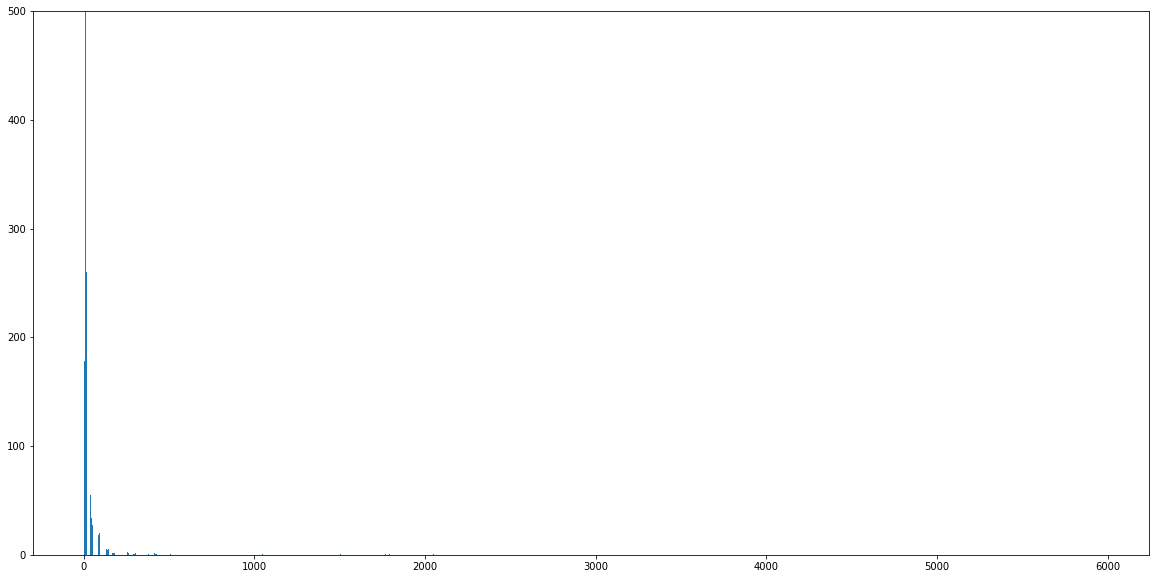

In [51]:
plt.figure(figsize=(20, 10))
plt.hist(df['count'], bins=len(df['count']))
plt.ylim(0, 500)
plt.show()

In [3]:
import os
import torchaudio
import torch
from tqdm import tqdm
from multiprocessing import Pool

languages = ["cs", "el", "tt", "uk"]
transform = torchaudio.transforms.MelSpectrogram(n_mels=49, hop_length=401, power=0.8)

def process_audio(src_dest_tuple):
        src, dest = src_dest_tuple
        waveform, _ = torchaudio.load(src)
        target = torch.zeros(49, 40)
        transformed = transform(waveform)[0]
        target[:, :transformed.shape[1]] = transformed
        torch.save(target.cuda(), dest)
    

for language in languages:
    path_to_clips = f"dataset/multilingual_spoken_words/wav/{language}/clips"
    path_to_output = f"dataset/multilingual_spoken_words/wav/{language}/clips_tensors"

    pbar = tqdm(os.listdir(path_to_clips), leave=False)
    for label in pbar:
        pbar.set_description(label)
        os.makedirs(f'{path_to_output}/{label}', exist_ok=True)
        args = [(f'{path_to_clips}/{label}/{audio}', f'{path_to_output}/{label}/{audio}'.replace(".wav", ".pt")) for audio in os.listdir(path_to_clips + "/" + label)]
        for arg in args:
            process_audio(arg)